# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

In [7]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
glob.glob(r'C:\Users\DIPRAJ\Music\Stock_analysis\S&P_resources\individual_stocks_5yr/*csv')

['C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\DIPRAJ\\Music\

In [5]:
len(glob.glob(r'C:\Users\DIPRAJ\Music\Stock_analysis\S&P_resources\individual_stocks_5yr/*csv'))

505

In [13]:
company_list = [
    r'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv' , 
    r'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv' , 
    r'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv' , 
    r'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
]

In [14]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = current_df.append(all_data , ignore_index=True)
    ##full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [15]:
all_data.shape

(4752, 7)

In [16]:
all_data.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [17]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

# Analysing change in stock prices over time

In [20]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [21]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [22]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [23]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [24]:
tech_list = all_data['Name'].unique()
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

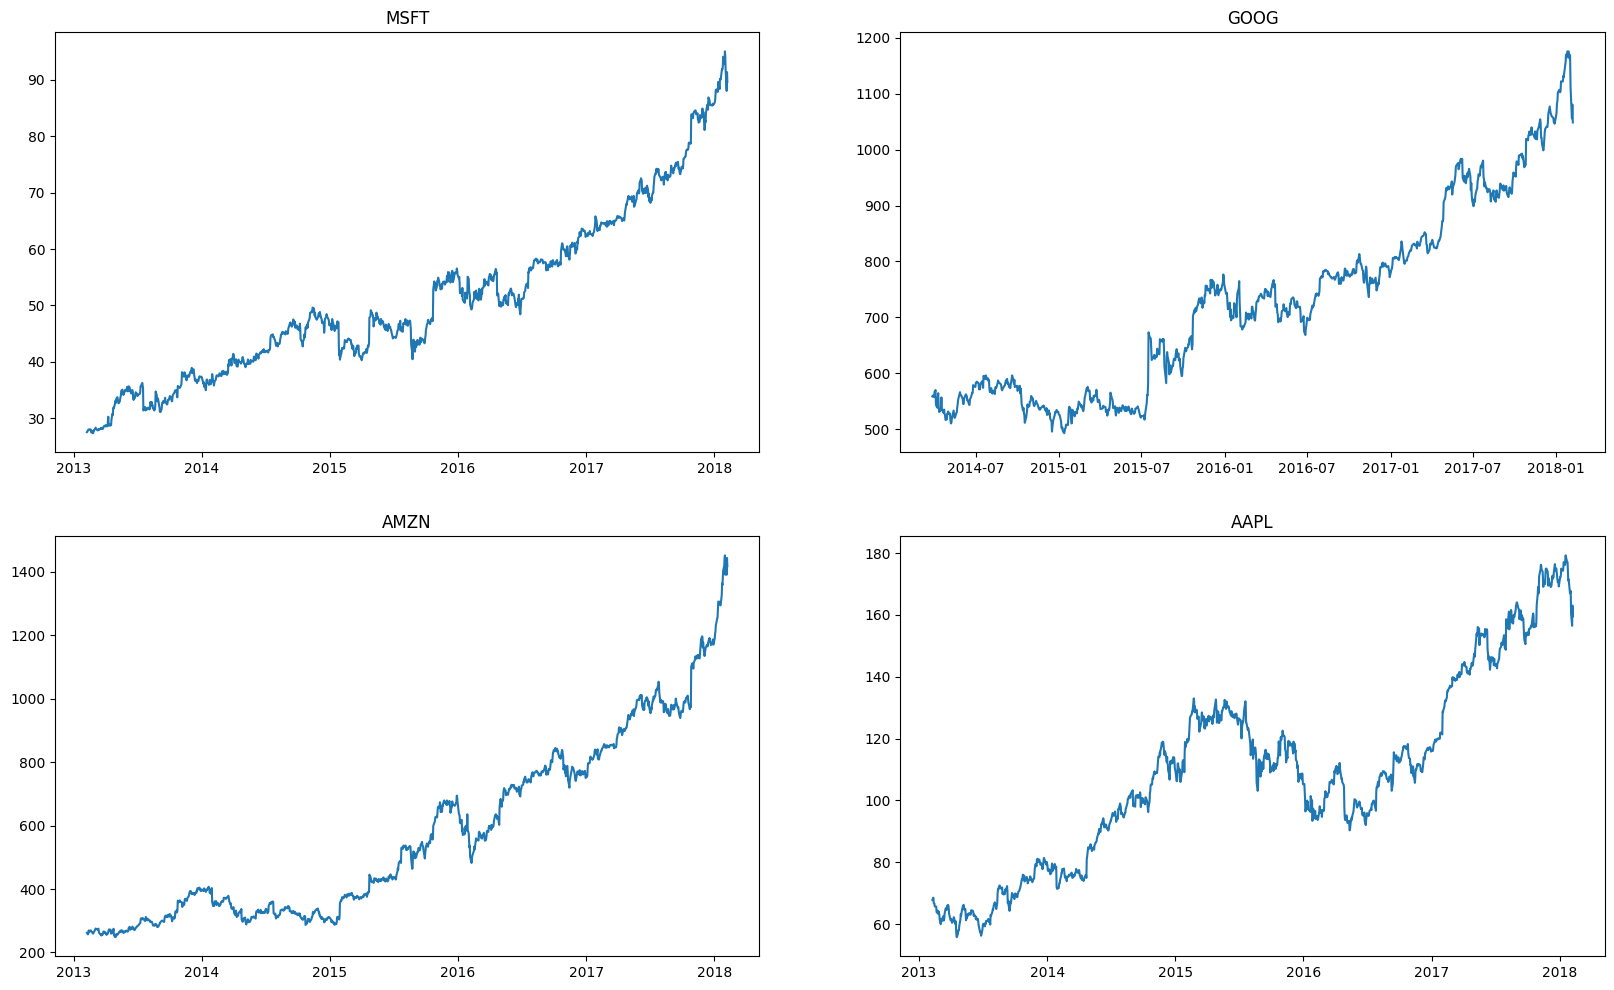

In [25]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'] , df['close'])
    plt.title(company)

# Moving averages

In [26]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [27]:
new_data = all_data.copy()

In [28]:
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [29]:
new_data.tail(7)

date     open      high       low   close    volume  Name  \
4745 2018-01-30  165.525  167.3700  164.7000  166.97  46048185  AAPL   
4746 2018-01-31  166.870  168.4417  166.5000  167.43  32478930  AAPL   
4747 2018-02-01  167.165  168.6200  166.7600  167.78  47230787  AAPL   
4748 2018-02-02  166.000  166.8000  160.1000  160.50  86593825  AAPL   
4749 2018-02-05  159.100  163.8800  156.0000  156.49  72738522  AAPL   
4750 2018-02-06  154.830  163.7200  154.0000  163.03  68243838  AAPL   
4751 2018-02-07  163.085  163.4000  159.0685  159.54  51608580  AAPL   

      close_10  close_20  close_50  
4745   174.263  174.3340  172.9460  
4746   173.096  174.0925  172.8726  
4747   171.948  173.8700  172.8252  
4748   170.152  173.2435  172.6356  
4749   168.101  172.3180  172.3026  
4750   166.700  171.7520  172.0640  
4751   165.232  171.0125  171.7554

In [30]:
new_data.set_index('date' , inplace=True)

In [31]:
new_data

open    high       low   close    volume  Name  close_10  \
date                                                                      
2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT       NaN   
2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT       NaN   
2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT       NaN   
2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT       NaN   
2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT       NaN   
...             ...     ...       ...     ...       ...   ...       ...   
2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   165.232   

            close_20  close_50  
date                            
2013-02-08       NaN       NaN  
2013-02-11       NaN       NaN  
2013-02-12       NaN       NaN  
2013-02-13       NaN       NaN  
2013-02-14       NaN       NaN  
...              ...       ...  
2018-02-01  173.8700  172.8252  
2018-02-02  173.2435  172.6356  
2018-02-05  172.3180  172.3026  
2018-02-06  171.7520  172.0640  
2018-02-07  171.0125  171.7554  

[4752 rows x 9 columns]

In [32]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

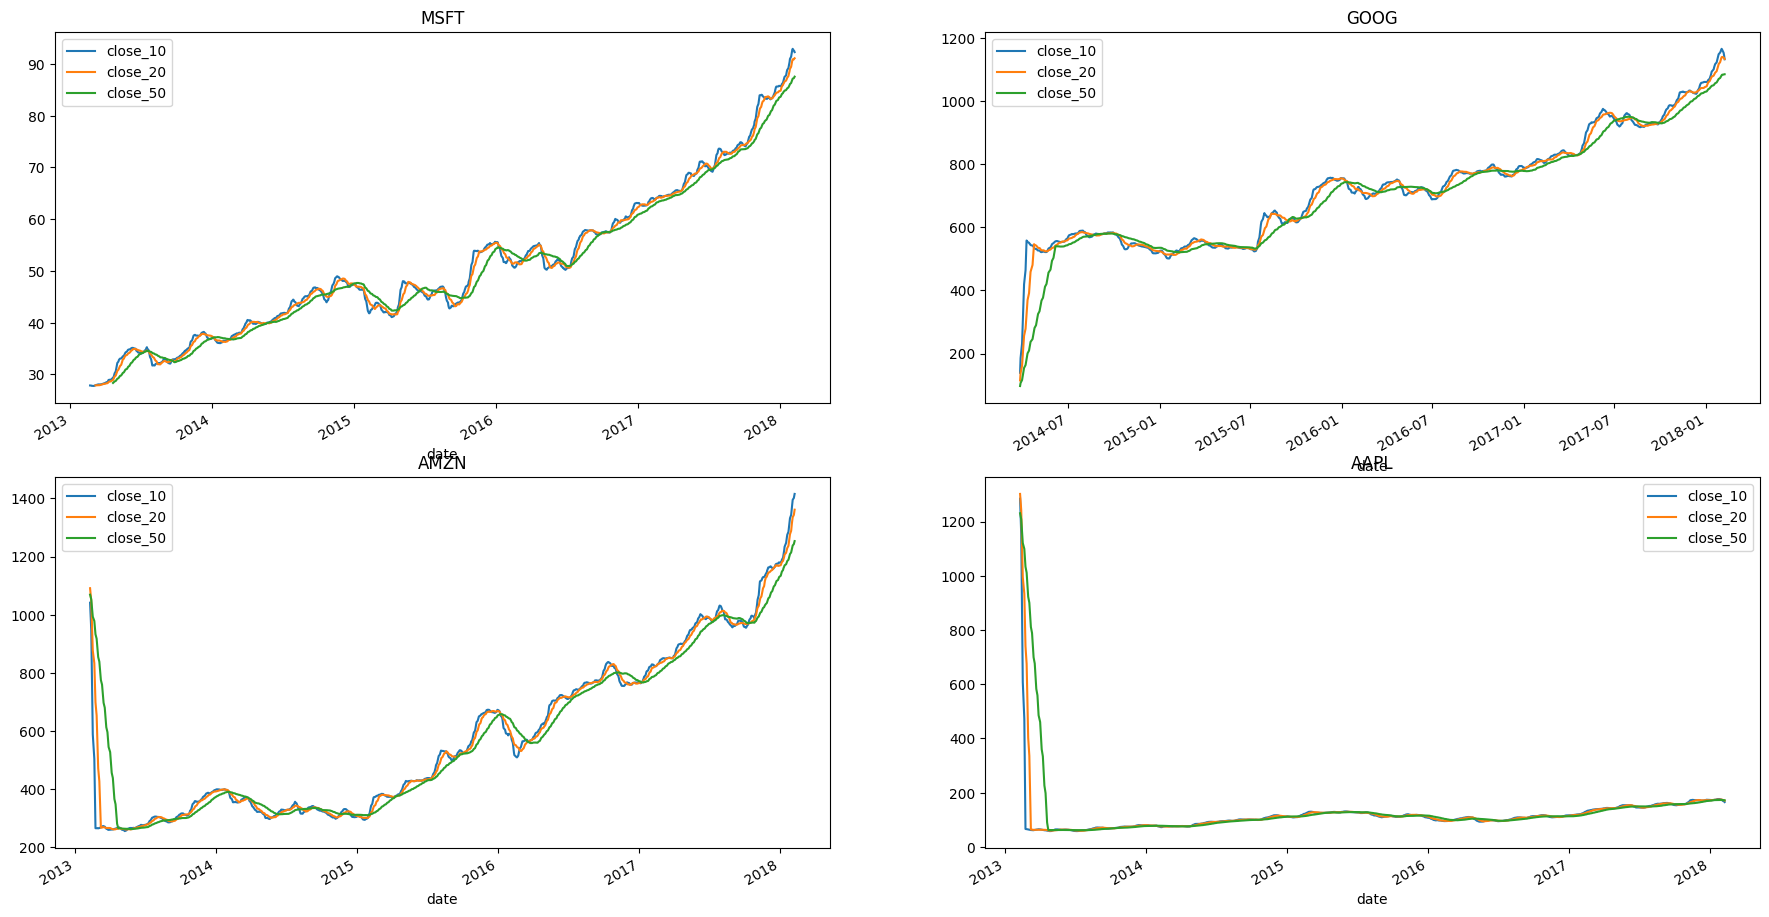

In [34]:
plt.figure(figsize=(22,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# Analyse closing price in Apple stocks

In [35]:
apple = pd.read_csv(r'C:\\Users\\DIPRAJ\\Music\\Stock_analysis\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')

In [36]:
apple.head(4)

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL

In [37]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [38]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

In [39]:
apple['Daily return(in %)']

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: Daily return(in %), Length: 1259, dtype: float64

In [42]:
import plotly.express as px

In [43]:
px.line(apple , x="date" , y="Daily return(in %)")

# Resampling of closig prices

In [44]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [45]:
apple['date'] = pd.to_datetime(apple['date'])

In [46]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [47]:
apple.head(4)

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

   Daily return(in %)  
0                 NaN  
1            1.042235  
2           -2.506658  
3           -0.190297

In [48]:
apple.set_index('date' , inplace=True)

In [49]:
apple.head(4)

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   

            Daily return(in %)  
date                            
2013-02-08                 NaN  
2013-02-11            1.042235  
2013-02-12           -2.506658  
2013-02-13           -0.190297

In [50]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot: xlabel='date'>

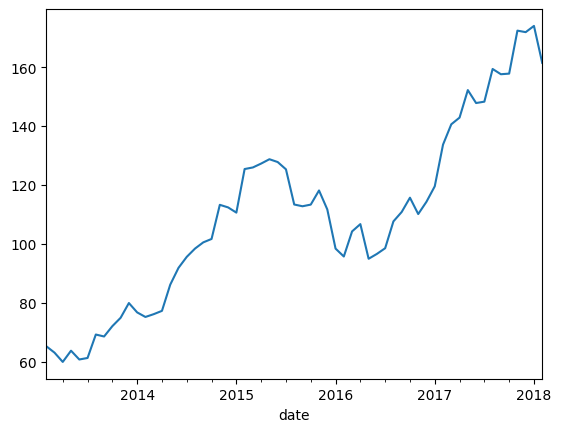

In [51]:
apple['close'].resample('M').mean().plot()

In [52]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot: xlabel='date'>

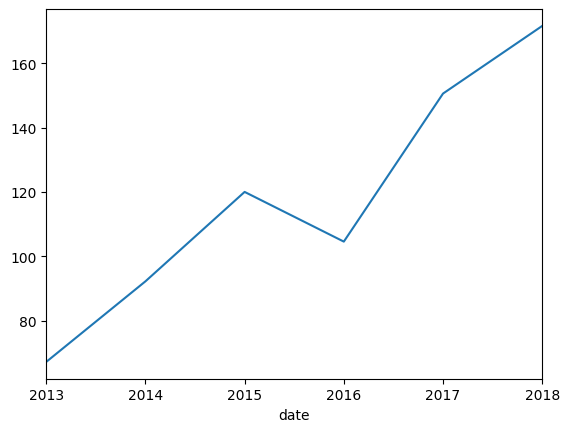

In [53]:
apple['close'].resample('Y').mean().plot() 

In [54]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot: xlabel='date'>

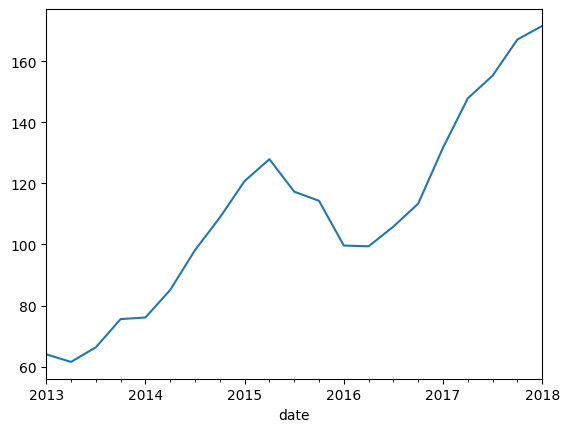

In [55]:
apple['close'].resample('Q').mean().plot()

# Correlation analysis

In [56]:
company_list

['C:\\\\Users\\\\DIPRAJ\\\\Music\\\\Stock_analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\DIPRAJ\\\\Music\\\\Stock_analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\DIPRAJ\\\\Music\\\\Stock_analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'C:\\\\Users\\\\DIPRAJ\\\\Music\\\\Stock_analysis\\\\S&P_resources\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [57]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [58]:
closing_price = pd.DataFrame()

In [59]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [60]:
closing_price

apple_close  amzn_close  goog_close  msft_close
0         67.8542      261.95      558.46       27.55
1         68.5614      257.21      559.99       27.86
2         66.8428      258.70      556.97       27.88
3         66.7156      269.47      567.16       28.03
4         66.6556      269.24      567.00       28.04
...           ...         ...         ...         ...
1254     167.7800     1390.00         NaN       94.26
1255     160.5000     1429.95         NaN       91.78
1256     156.4900     1390.00         NaN       88.00
1257     163.0300     1442.84         NaN       91.33
1258     159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]

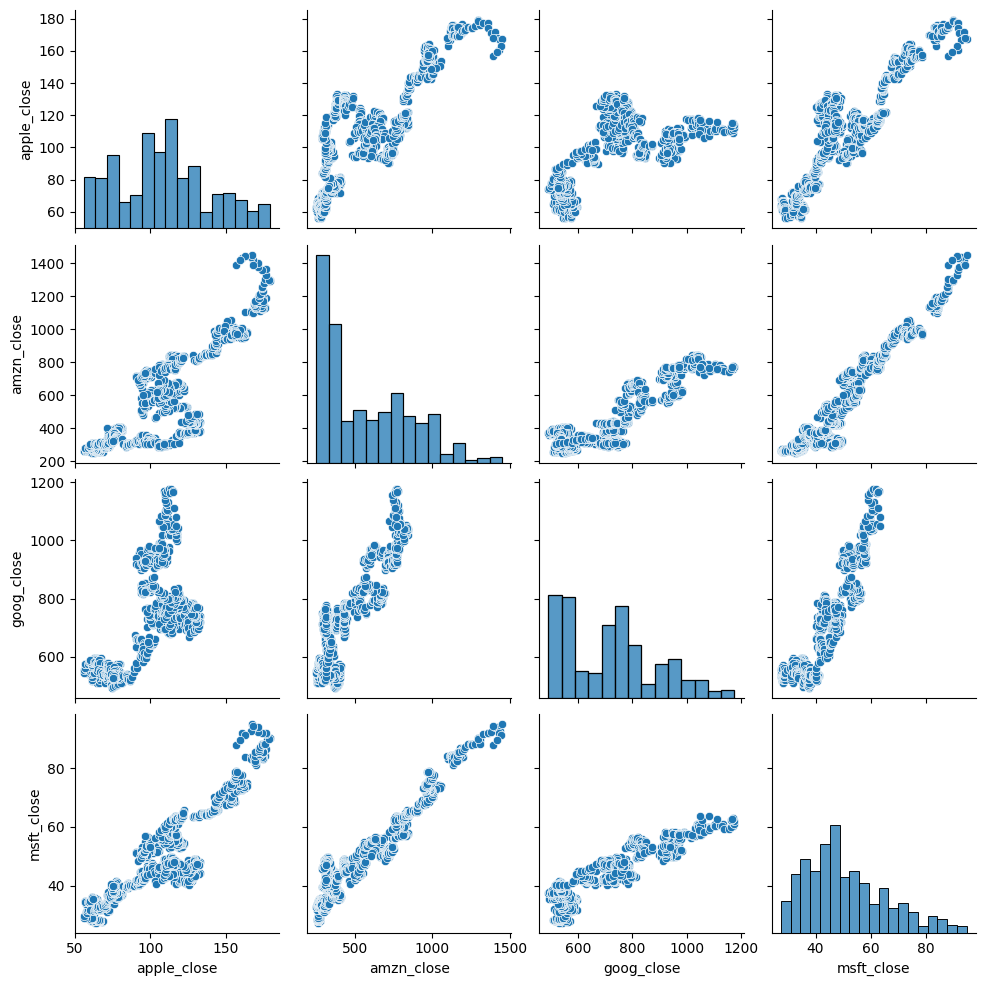

In [61]:
sns.pairplot(closing_price)

In [62]:
closing_price.corr()

apple_close  amzn_close  goog_close  msft_close
apple_close     1.000000    0.819078    0.640522    0.899689
amzn_close      0.819078    1.000000    0.888456    0.955977
goog_close      0.640522    0.888456    1.000000    0.907011
msft_close      0.899689    0.955977    0.907011    1.000000

<AxesSubplot: >

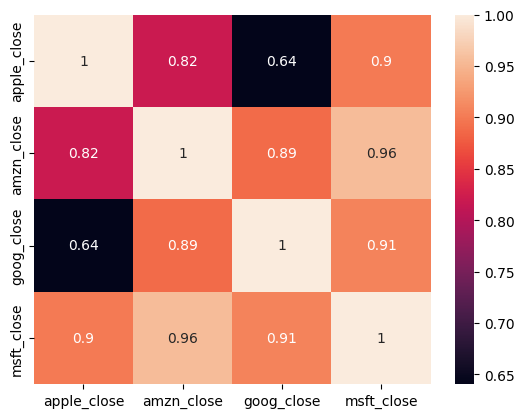

In [63]:
sns.heatmap(closing_price.corr() , annot=True)


Conclusions : 
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96

# Correlation of Daily returns

In [65]:
closing_price

apple_close  amzn_close  goog_close  msft_close
0         67.8542      261.95      558.46       27.55
1         68.5614      257.21      559.99       27.86
2         66.8428      258.70      556.97       27.88
3         66.7156      269.47      567.16       28.03
4         66.6556      269.24      567.00       28.04
...           ...         ...         ...         ...
1254     167.7800     1390.00         NaN       94.26
1255     160.5000     1429.95         NaN       91.78
1256     156.4900     1390.00         NaN       88.00
1257     163.0300     1442.84         NaN       91.33
1258     159.5400     1416.78         NaN       89.61

[1259 rows x 4 columns]

In [66]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [67]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [69]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = closing_price[col].pct_change() * 100

In [71]:
closing_price

apple_close  amzn_close  goog_close  msft_close  apple_close_pct_change  \
0         67.8542      261.95      558.46       27.55                     NaN   
1         68.5614      257.21      559.99       27.86                1.042235   
2         66.8428      258.70      556.97       27.88               -2.506658   
3         66.7156      269.47      567.16       28.03               -0.190297   
4         66.6556      269.24      567.00       28.04               -0.089934   
...           ...         ...         ...         ...                     ...   
1254     167.7800     1390.00         NaN       94.26                0.209043   
1255     160.5000     1429.95         NaN       91.78               -4.339015   
1256     156.4900     1390.00         NaN       88.00               -2.498442   
1257     163.0300     1442.84         NaN       91.33                4.179181   
1258     159.5400     1416.78         NaN       89.61               -2.140710   

      amzn_close_pct_change  goog_close_pct_change  msft_close_pct_change  \
0                       NaN                    NaN                    NaN   
1                 -1.809506               0.273968               1.125227   
2                  0.579293              -0.539295               0.071788   
3                  4.163123               1.829542               0.538020   
4                 -0.085353              -0.028211               0.035676   
...                     ...                    ...                    ...   
1254              -4.196734               0.000000              -0.789391   
1255               2.874101               0.000000              -2.631021   
1256              -2.793804               0.000000              -4.118544   
1257               3.801439               0.000000               3.784091   
1258              -1.806160               0.000000              -1.883280   

      apple_close_pct_change_pct_change  amzn_close_pct_change_pct_change  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                           -340.508048                       -132.013892   
3                            -92.408330                        618.655669   
4                            -52.740255                       -102.050209   
...                                 ...                               ...   
1254                         -24.122086                       -561.679318   
1255                       -2175.660985                       -168.484217   
1256                         -42.419140                       -197.206196   
1257                        -267.271450                       -236.066771   
1258                        -151.223204                       -147.512538   

      goog_close_pct_change_pct_change  msft_close_pct_change_pct_change  
0                                  NaN                               NaN  
1                                  NaN                               NaN  
2                          -296.846326                        -93.620175  
3                          -439.246761                        649.461980  
4                          -101.541956                        -93.369009  
...                                ...                               ...  
1254                               NaN                       -132.250257  
1255                               NaN                        233.297687  
1256                               NaN                         56.537899  
1257                               NaN                       -191.879329  
1258                               NaN                       -149.768371  

[1259 rows x 12 columns]

In [72]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change',
       'apple_close_pct_change_pct_change', 'amzn_close_pct_change_pct_change',
       'goog_close_pct_change_pct_change', 'msft_close_pct_change_pct_change'],
      dtype='object')

In [73]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [74]:
clsing_p

apple_close_pct_change  amzn_close_pct_change  goog_close_pct_change  \
0                        NaN                    NaN                    NaN   
1                   1.042235              -1.809506               0.273968   
2                  -2.506658               0.579293              -0.539295   
3                  -0.190297               4.163123               1.829542   
4                  -0.089934              -0.085353              -0.028211   
...                      ...                    ...                    ...   
1254                0.209043              -4.196734               0.000000   
1255               -4.339015               2.874101               0.000000   
1256               -2.498442              -2.793804               0.000000   
1257                4.179181               3.801439               0.000000   
1258               -2.140710              -1.806160               0.000000   

      msft_close_pct_change  
0                       NaN  
1                  1.125227  
2                  0.071788  
3                  0.538020  
4                  0.035676  
...                     ...  
1254              -0.789391  
1255              -2.631021  
1256              -4.118544  
1257               3.784091  
1258              -1.883280  

[1259 rows x 4 columns]


Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells dist.. on rest of the plot 


Pairgrid : Once we create grid , we can set plot as per our need : 

ie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4



    There would be various possibilities for type of plots in our Pairgrid which we can set as per our need :

    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..


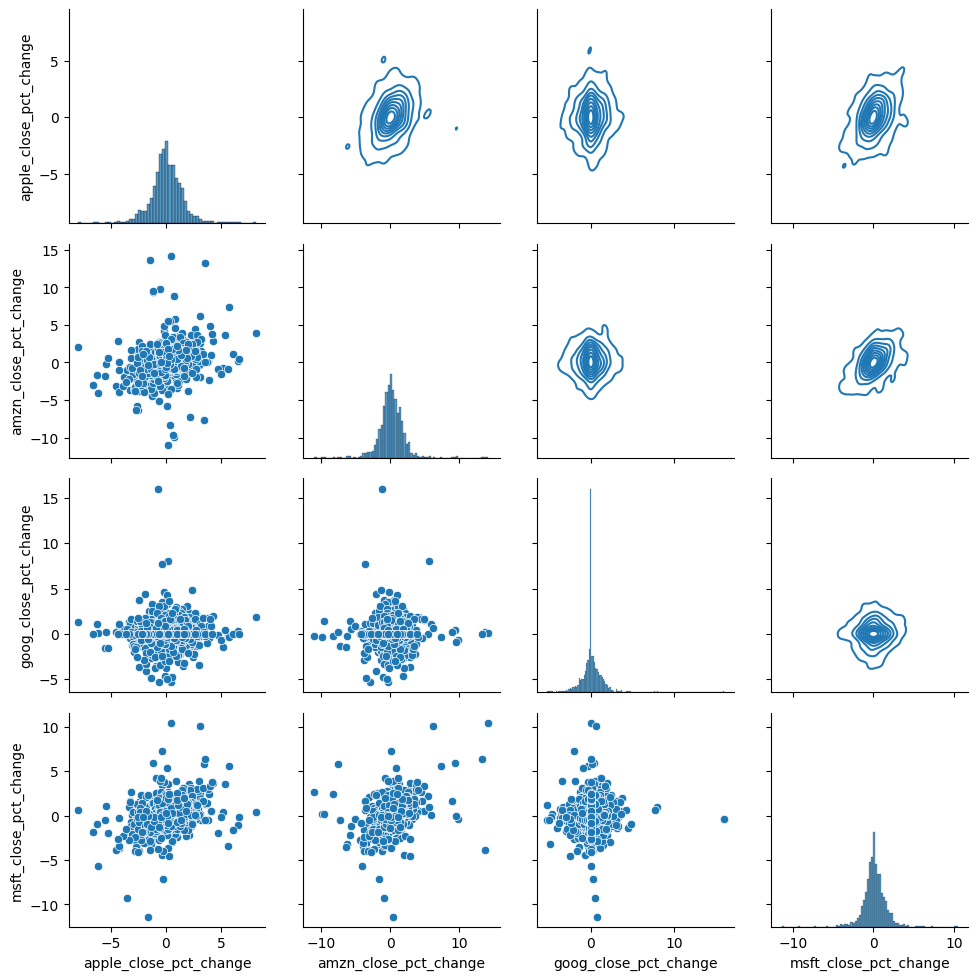

In [75]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [76]:
clsing_p.corr()

apple_close_pct_change  amzn_close_pct_change  \
apple_close_pct_change                1.000000               0.287659   
amzn_close_pct_change                 0.287659               1.000000   
goog_close_pct_change                 0.032996               0.025323   
msft_close_pct_change                 0.366598               0.402678   

                        goog_close_pct_change  msft_close_pct_change  
apple_close_pct_change               0.032996               0.366598  
amzn_close_pct_change                0.025323               0.402678  
goog_close_pct_change                1.000000               0.036436  
msft_close_pct_change                0.036436               1.000000

Conclusion :
While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship upto some extent..